In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.preprocessing import LabelEncoder

In [3]:
df_train = pd.read_csv('SalaryData_Train.csv')
df_test = pd.read_csv('SalaryData_Test.csv')

In [4]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df_train.shape

(30161, 14)

In [9]:
df_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [10]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [11]:
df_test.shape

(15060, 14)

In [12]:
df_train = df_train.drop(columns=['maritalstatus','relationship','race','sex'],axis=1)

In [13]:
df_train.head()

,age,workclass,education,educationno,occupation,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Adm-clerical,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,0,0,40,United-States,<=50K
3,53,Private,11th,7,Handlers-cleaners,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Prof-specialty,0,0,40,Cuba,<=50K


In [14]:
df_test = df_test.drop(columns=['maritalstatus','relationship','race','sex'],axis=1)

In [15]:
df_test.head()

,age,workclass,education,educationno,occupation,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Machine-op-inspct,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Farming-fishing,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Protective-serv,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Machine-op-inspct,7688,0,40,United-States,>50K
4,34,Private,10th,6,Other-service,0,0,30,United-States,<=50K


In [16]:
# detecting outliers in dataset

(30161, 10)


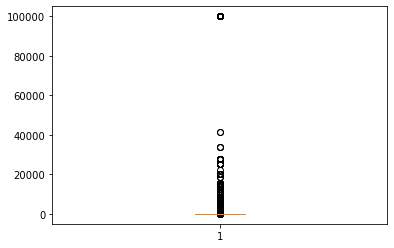

In [17]:
plt.boxplot(df_train["capitalgain"])
print(df_train.shape)

K:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

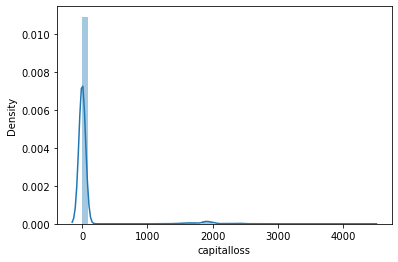

In [18]:
sns.distplot(df_train["capitalloss"])

In [19]:
# removing outliers from capital gain variable

K:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(30161, 10)


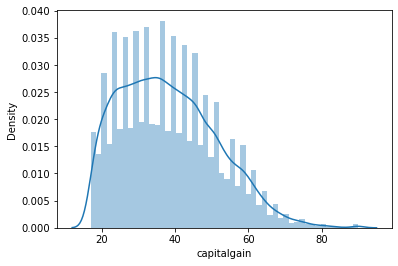

In [20]:
df_train["capitalgain"] = df_train.loc[df_train["capitalgain"]<=20000]
sns.distplot(df_train["capitalgain"])
print(df_train.shape)

K:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

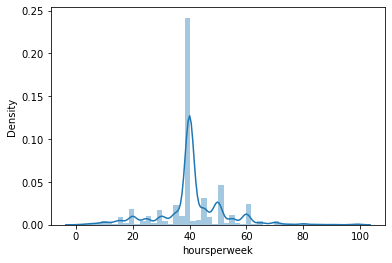

In [28]:
sns.distplot(df_train["hoursperweek"])

In [29]:
# Missing Values and Imputation

<AxesSubplot:>

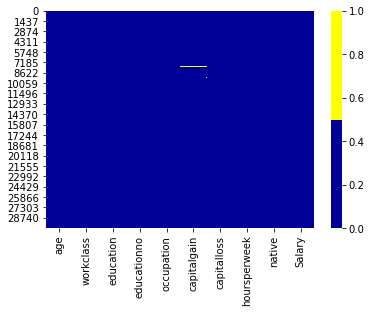

In [23]:
import seaborn as sns
cols = df_train.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_train[cols].isnull(),
            cmap=sns.color_palette(colours))

In [24]:
df_train.isnull().sum()

age               0
workclass         0
education         0
educationno       0
occupation        0
capitalgain     232
capitalloss       0
hoursperweek      0
native            0
Salary            0
dtype: int64

In [25]:
mean = df_train['capitalgain'].mean()
mean

38.3537371779879

In [26]:
for i in df_train.columns:
    try:
        mean=df_train[i].mean()
        df_train[i]=df_train[i].fillna(mean)
    except:
        pass

<AxesSubplot:>

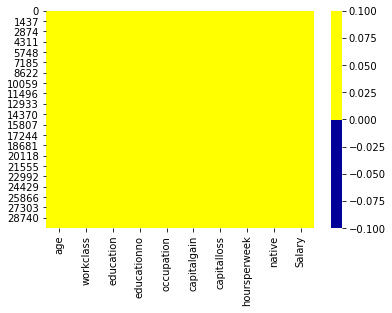

In [27]:
cols = df_train.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_train[cols].isnull(),
            cmap=sns.color_palette(colours))

In [30]:
# Label Encoding

In [31]:
labelencoder = LabelEncoder()

In [32]:
df_train.iloc[:,-1] = labelencoder.fit_transform(df_train.iloc[:,-1])

In [33]:
df_test.iloc[:,-1] = labelencoder.fit_transform(df_test.iloc[:,-1])

In [34]:
x_test = pd.get_dummies(df_test.iloc[:,:9])
y_test = df_test[['Salary']]

In [35]:
x_test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
y_test.head()

,Salary
0,0
1,0
2,1
3,1
4,0


In [37]:
# getting dummies

In [38]:
x_train = pd.get_dummies(df_train.iloc[:,:9])
y_train = df_train[['Salary']]

In [39]:
x_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,39.0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,50.0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,38.0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,53.0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,28.0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Model building using Gaussian

In [41]:
model=GaussianNB()
model=model.fit(x_train,y_train)

K:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [42]:
y_test_pred=model.predict(x_test)  #Predicting the values using model1

In [43]:
metrics.accuracy_score(y_test,y_test_pred)

0.5027224435590969

In [57]:
# accuracy score is 50%

In [45]:
# Model building using Multinomial

In [46]:
model2 = MultinomialNB()

In [47]:
model2.fit(x_train,y_train)

K:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [48]:
y_test_pred2=model2.predict(x_test)

In [49]:
metrics.accuracy_score(y_test,y_test_pred2)

0.7549136786188579

In [58]:
# accuracy score is 75%

In [51]:
# Model building using Bernoulli

In [52]:
model3 = BernoulliNB()

In [53]:
model3.fit(x_train,y_train)

K:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BernoulliNB()

In [54]:
y_train_pred3=model3.predict(x_train)

In [55]:
metrics.accuracy_score(y_train,y_train_pred3)

0.7660555021385232

In [59]:
# accuracy score is 76%